In [1]:
import os
import pandas as pd
import  datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.
We suggest spending 1-2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better ­­ no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

In [2]:
## https://grouplens.org/datasets/movielens/20m/
data_path = '/Users/yangx/Downloads/relax_challenge/'
users = 'takehome_users.csv'
engagement = 'takehome_user_engagement.csv'

users = pd.read_csv(data_path + users,encoding = "ISO-8859-1")
engagement = pd.read_csv(data_path + engagement,encoding = "ISO-8859-1")

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
engagement['time_stamp'] = pd.to_datetime(engagement.time_stamp)

In [7]:
engagement = engagement.sort_values(by = ['user_id','time_stamp'])

In [8]:
engagement.head(10)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [9]:
# select the users who has at least 3 visits
df1 = engagement.groupby('user_id').filter(lambda x: len(x) >=3)
# reset index 
df1.reset_index(drop=True, inplace = True)

In [10]:
active = 0
# active_users =[]
active_users = {}
for i in range(len(df1)-2):
    user = df1['user_id'][i] # get user_id
    if user != active and user == df1['user_id'][i+2]: # skip comparison if the user is active
        start_date = pd.Timestamp(df1['time_stamp'][i]) 
        end_date = start_date + pd.Timedelta('7D')
        if start_date < pd.Timestamp(df1['time_stamp'][i+1]) < end_date and start_date < pd.Timestamp(df1['time_stamp'][i+2]) < end_date:
#             active_users.append(user)
            active_users[user] = 'active'
            active = user
        
    


In [11]:
len(active_users)

1602

In [12]:
# map active users to users table
users['active_user'] = users['object_id'].map(active_users)

# create a binary variable
users['active_user_label'] = ~users.active_user.isnull()

users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_user,active_user_label
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,active,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN,False


### check missing value

In [14]:
users.isnull().sum()/len(users)

object_id                     0.00000
creation_time                 0.00000
name                          0.00000
email                         0.00000
creation_source               0.00000
last_session_creation_time    0.26475
opted_in_to_mailing_list      0.00000
enabled_for_marketing_drip    0.00000
org_id                        0.00000
invited_by_user_id            0.46525
active_user                   0.86650
active_user_label             0.00000
dtype: float64

### handling missing data
1. last_session_creation_time
2. invited_by_user_id

In [25]:
#last_session_creation_time

users['having_last_session_creation'] = (~users.last_session_creation_time.isnull())

users.groupby(['having_last_session_creation','active_user_label'])['object_id'].size()

having_last_session_creation  active_user_label
False                         False                3177
True                          False                7221
                              True                 1602
Name: object_id, dtype: int64

<AxesSubplot:xlabel='having_last_session_creation', ylabel='count'>

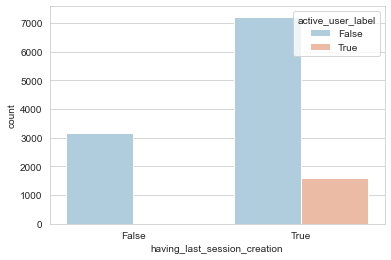

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='having_last_session_creation',hue='active_user_label',data=users,palette='RdBu_r')

#### This is very interesting. Almost all users missing last_session_creation_time are inactive users.

In [27]:
#invited_by_user_id

users['invited'] = (~users.invited_by_user_id.isnull())

users.groupby(['invited','active_user_label'])['object_id'].size()

invited  active_user_label
False    False                4894
         True                  689
True     False                5504
         True                  913
Name: object_id, dtype: int64

<AxesSubplot:xlabel='invited', ylabel='count'>

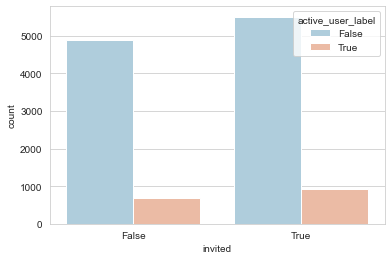

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='invited',hue='active_user_label',data=users,palette='RdBu_r')

In [30]:
users.drop(['last_session_creation_time','invited_by_user_id','active_user'], axis=1, inplace = True )

In [32]:
users.isnull().sum()

object_id                       0
creation_time                   0
name                            0
email                           0
creation_source                 0
opted_in_to_mailing_list        0
enabled_for_marketing_drip      0
org_id                          0
active_user_label               0
last_session_creation           0
having_last_session_creation    0
invited                         0
dtype: int64

In [33]:
users.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

<AxesSubplot:xlabel='creation_source', ylabel='count'>

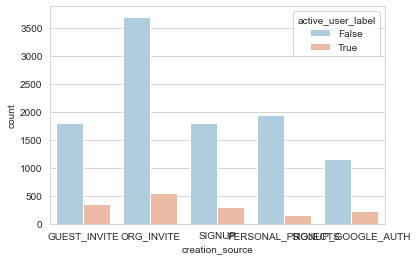

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='creation_source',hue='active_user_label',data=users,palette='RdBu_r')

In [35]:
users.opted_in_to_mailing_list.unique()

array([1, 0])

In [36]:
users.enabled_for_marketing_drip.unique()

array([0, 1])

In [37]:
users.creation_time.min(), users.creation_time.max()

('2012-05-31 00:43:27', '2014-05-30 23:59:19')

In [39]:
users.groupby('active_user_label')['object_id'].size()/len(users)

active_user_label
False    0.8665
True     0.1335
Name: object_id, dtype: float64

## Feature engineering 


In [40]:
import re
# re.findall(r'[\w\.-]+@[\w\.-]+', 'AugustCClausen@yahoo.com')

In [41]:
re.findall('@+\S+','AugustCClausen@yahoo.com')[0]

'@yahoo.com'

In [42]:
users['email_domain'] = users['email'].apply(lambda x: re.findall('@+\S+', x)[0])

In [43]:
users['email_domain'].nunique()

1184

#### too many email domains may cause overfitting. let's try tld

In [44]:

users['tld'] = users.email_domain.str.split('.')

In [45]:
users['tld'] = users['tld'].apply(lambda x: x[-1])

In [46]:
users.tld.unique()

array(['com', 'de'], dtype=object)

##### only two categories, nice!
#### Add day of week as a new feature

In [47]:
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['creation_dayofweek'] = users['creation_time'].dt.dayofweek

users['creation_weekday'] = users['creation_time'].dt.day_name()

In [48]:
users.head()

,object_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,active_user_label,last_session_creation,having_last_session_creation,invited,email_domain,tld,creation_dayofweek,creation_weekday
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,False,True,True,True,@yahoo.com,com,1,Tuesday
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,True,True,True,True,@gustr.com,com,4,Friday
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,False,True,True,True,@gustr.com,com,1,Tuesday
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,False,True,True,True,@yahoo.com,com,1,Tuesday
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,False,True,True,True,@yahoo.com,com,3,Thursday


In [49]:
users.isnull().sum()/len(users)

object_id                       0.0
creation_time                   0.0
name                            0.0
email                           0.0
creation_source                 0.0
opted_in_to_mailing_list        0.0
enabled_for_marketing_drip      0.0
org_id                          0.0
active_user_label               0.0
last_session_creation           0.0
having_last_session_creation    0.0
invited                         0.0
email_domain                    0.0
tld                             0.0
creation_dayofweek              0.0
creation_weekday                0.0
dtype: float64

In [50]:
df = users[['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id','having_last_session_creation','invited',
            'tld','creation_weekday','active_user_label']]

df = pd.get_dummies(df, columns=['creation_weekday','tld','creation_source'])


In [51]:
df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,having_last_session_creation,invited,active_user_label,creation_weekday_Friday,creation_weekday_Monday,creation_weekday_Saturday,creation_weekday_Sunday,creation_weekday_Thursday,creation_weekday_Tuesday,creation_weekday_Wednesday,tld_com,tld_de,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,True,True,False,0,0,0,0,0,1,0,1,0,1,0,0,0,0
1,0,0,1,True,True,True,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,0,94,True,True,False,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,0,0,1,True,True,False,0,0,0,0,0,1,0,1,0,1,0,0,0,0
4,0,0,193,True,True,False,0,0,0,0,1,0,0,1,0,1,0,0,0,0


### Modeling and Evaluation
1. Try h20 Auto ML
2. Try GBM
3. Try RF

### Evaluation
Due the imbalanced the dataset, AUC and F1 score are chosen as evaluation metrics. 

In [52]:
import h2o 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_152-release"; OpenJDK Runtime Environment (build 1.8.0_152-release-1056-b12); OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)
  Starting server from /opt/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/rd/t63ph2p91dd5_hvst6r3c76d1q8rft/T/tmpo5bcwvi8
  JVM stdout: /var/folders/rd/t63ph2p91dd5_hvst6r3c76d1q8rft/T/tmpo5bcwvi8/h2o_yangx_started_from_python.out
  JVM stderr: /var/folders/rd/t63ph2p91dd5_hvst6r3c76d1q8rft/T/tmpo5bcwvi8/h2o_yangx_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.1
H2O_cluster_version_age:,1 month and 16 days
H2O_cluster_name:,H2O_from_python_yangx_1620by
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.556 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"accepting new members, healthy"


In [53]:
#Let’s say we want to give the H2O instance 4GB of memory and it should only use 2 cores.
#Allocate resources 
h2o.init(nthreads=2,max_mem_size=4)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.1
H2O_cluster_version_age:,1 month and 16 days
H2O_cluster_name:,H2O_from_python_yangx_1620by
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.556 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [55]:
# col_dtypes = {'col1_name':col1_type, 'col2_name':col2_type}
# na_list = ['NA', 'none', 'nan', 'etc']

# hdf = h2o.H2OFrame(df, column_types=col_dtypes, na_strings=na_list)
hdf = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [56]:
train, valid = hdf.split_frame(ratios = [.8], seed = 77)

response = 'active_user_label'
predictors = df.drop('active_user_label', axis=1).columns.tolist()

In [60]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

gbm = H2OGradientBoostingEstimator(seed = 1234)

gbm.train(x = predictors, y = response, training_frame = train, validation_frame = valid)

# print the auc for the validation data
gbm.auc(valid=True)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


0.6951922184354653

In [69]:
gbm.auc(train=True, valid=True, xval=False)

{'train': 0.7736505169071326, 'valid': 0.6951922184354653}

In [68]:
gbm.accuracy(train=True, valid=True, xval=False)

{'train': [[0.35283709185996365, 0.8666251814976146]],
 'valid': [[0.4697154764098991, 0.8757421543681085]]}

In [66]:
gbm.F1(train=True, valid=True, xval=False)

{'train': [[0.19199458416208215, 0.38424124513618674]],
 'valid': [[0.13251753846725373, 0.3084982537834692]]}

In [61]:
from h2o.estimators import H2ORandomForestEstimator
response = 'active_user_label'

predictors = df.drop('active_user_label', axis=1).columns.tolist()

rf = H2ORandomForestEstimator(seed = 1234)

rf.train(x = predictors, y = response, training_frame = train, validation_frame = valid)

# print the auc for the validation data
rf.auc(valid=True)

drf Model Build progress: |███████████████████████████████████████████████| 100%


0.6739944834170988

In [70]:
rf.auc(train = True, valid = True, xval= False)

{'train': 0.6632591901727177, 'valid': 0.6739944834170988}

In [65]:
# retrieve the F1 coefficient for both the training and validation data:
rf.F1(train=True, valid=True, xval=False)

{'train': [[0.020859719453602977, 0.3115015974440895]],
 'valid': [[0.056757310271263114, 0.2994722955145119]]}

In [62]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=predictors, y=response, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [63]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows) 

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20200926_163539,0.700913,0.360972,0.215473,0.339525,0.334227,0.111708
GLM_1_AutoML_20200926_163539,0.699326,0.34993,0.216502,0.340396,0.331854,0.110127
StackedEnsemble_AllModels_AutoML_20200926_163539,0.696347,0.359932,0.213915,0.348951,0.33401,0.111562
XGBoost_grid__1_AutoML_20200926_163539_model_3,0.695665,0.353644,0.21118,0.337883,0.333362,0.11113
GBM_5_AutoML_20200926_163539,0.694168,0.354614,0.211852,0.337612,0.333399,0.111155
GBM_2_AutoML_20200926_163539,0.693705,0.356739,0.21065,0.351156,0.334471,0.111871
XGBoost_3_AutoML_20200926_163539,0.693275,0.356948,0.209025,0.347636,0.334874,0.112141
GBM_1_AutoML_20200926_163539,0.692952,0.356931,0.207921,0.343657,0.334481,0.111877
GBM_3_AutoML_20200926_163539,0.691895,0.359665,0.209275,0.345266,0.335669,0.112673
XGBoost_grid__1_AutoML_20200926_163539_model_4,0.690812,0.358138,0.209011,0.34474,0.335362,0.112468


Due to the limiation of 1-2hrs, the current AUC score and F1 look good based on the first iteration. 

### Next
Also grid search or random search and cross validation can be applied to tune the model and get more accurate estimation of model performance if we have more time. 